In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('/Users/hp/Desktop/Data Science/Project 1/ANZ synthesised transaction dataset.xlsx',
                 'tran',index_col =None,na_values=['NA'])

In [4]:
dk = df.copy()
dk.drop(['bpay_biller_code','merchant_id','merchant_code','merchant_suburb',
        'merchant_state','merchant_long_lat','card_present_flag'],axis=1,inplace=True)

In [5]:
salary = dk[dk['txn_description'].isin(['PAY/SALARY'])]
no_of_salary = salary.groupby('customer_id').sum()
max_salary = salary.groupby('customer_id').max()
min_salary = salary.groupby('customer_id').mean()
debit_things = dk[dk['movement'].isin(['debit'])]
credit_things = dk[dk['movement'].isin(['credit'])]

In [6]:
annual_salary = no_of_salary.amount*4

In [7]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

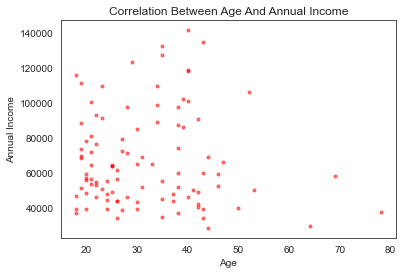

In [8]:
x = max_salary.age
y = annual_salary
area = np.pi*3
plt.scatter(x, y, s=area, c='r', alpha=0.5)
plt.title('Correlation Between Age And Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

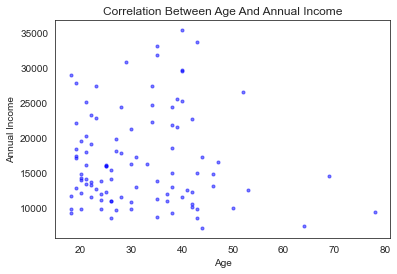

In [9]:
x = max_salary.age
y = no_of_salary.amount
area = np.pi*3
plt.scatter(x, y, s=area, c='b', alpha=0.5)
plt.title('Correlation Between Age And Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [10]:
customers = dk.groupby('customer_id')
balance_max = customers.balance.max()

In [11]:
purchases = debit_things.groupby('customer_id').sum()
avg_purchases = debit_things.groupby('customer_id').mean()

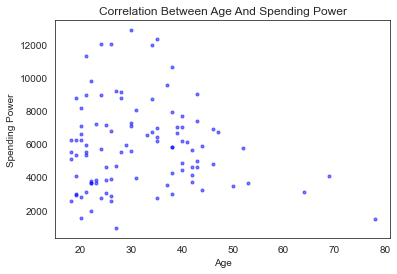

In [12]:
x = avg_purchases.age
y = purchases.amount
area = np.pi*3
plt.scatter(x, y, s=area, c='b', alpha=0.5)
plt.title('Correlation Between Age And Spending Power')
plt.xlabel('Age')
plt.ylabel('Spending Power')
plt.show()

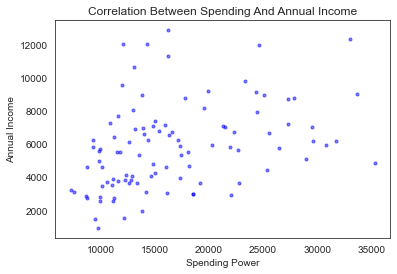

In [13]:
x = no_of_salary.amount
y = purchases.amount
area = np.pi*3
plt.scatter(x, y, s=area, c='b', alpha=0.5)
plt.title('Correlation Between Spending And Annual Income')
plt.xlabel('Spending Power')
plt.ylabel('Annual Income')
plt.show()

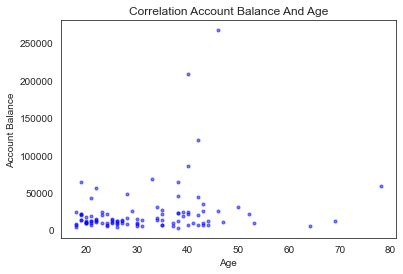

In [14]:
x = max_salary.age
y = balance_max
area = np.pi*3
plt.scatter(x, y, s=area, c='b', alpha=0.5)
plt.title('Correlation Account Balance And Age')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [17]:
test_salary = salary.iloc[354:]
test_salary_cus = test_salary.groupby('customer_id')
X_test = test_salary_cus.age.mean()
y_test = test_salary_cus.amount.mean()

In [18]:
train_salary = salary.iloc[:354]
train_salary_cus = train_salary.groupby('customer_id')
X_train = train_salary_cus.age.mean()
y_train = train_salary_cus.amount.mean()

In [19]:
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

In [20]:
linreg = LinearRegression().fit(X_train, y_train)

In [21]:
y_pred = linreg.predict(X_test)

In [22]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


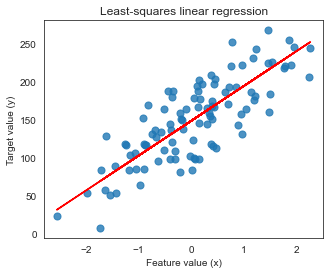

In [23]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()